In [1]:
# https://www.kaggle.com/competitions/playground-series-s4e12

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train, test = pd.read_csv('data/train.csv'), pd.read_csv('data/test.csv')

[EDA | LightGBM & Optuna | 1.0644 | V1](https://www.kaggle.com/code/adrienmorel97/eda-lightgbm-optuna-1-0644-v1)

In [3]:
train.head()

id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   
1   1  39.0  Female        31678.0       Divorced                   3.0   
2   2  23.0    Male        25602.0       Divorced                   3.0   
3   3  21.0    Male       141855.0        Married                   2.0   
4   4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location  ... Previous Claims  \
0      Bachelor's  Self-Employed     22.598761     Urban  ...             2.0   
1        Master's            NaN     15.569731     Rural  ...             1.0   
2     High School  Self-Employed     47.177549  Suburban  ...             1.0   
3      Bachelor's            NaN     10.938144     Rural  ...             1.0   
4      Bachelor's  Self-Employed     20.376094     Rural  ...             0.0   

   Vehicle Age  Credit Score  Insurance Duration           Policy Start Date  \
0         17.0         372.0                 5.0  2023-12-23 15:21:39.134960   
1         12.0         694.0                 2.0  2023-06-12 15:21:39.111551   
2         14.0           NaN                 3.0  2023-09-30 15:21:39.221386   
3          0.0         367.0                 1.0  2024-06-12 15:21:39.226954   
4          8.0         598.0                 4.0  2021-12-01 15:21:39.252145   

  Customer Feedback Smoking Status Exercise Frequency Property Type  \
0              Poor             No             Weekly         House   
1           Average            Yes            Monthly         House   
2              Good            Yes             Weekly         House   
3              Poor            Yes              Daily     Apartment   
4              Poor            Yes             Weekly         House   

  Premium Amount  
0         2869.0  
1         1483.0  
2          567.0  
3          765.0  
4         2022.0  

[5 rows x 21 columns]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [5]:
# Segregating Columns

target_col = 'Premium Amount'

cat_cols = train.select_dtypes(include=['object']).columns
num_cols = train.select_dtypes(exclude=['object']).columns

print(f'Target Column: {target_col}')
print(f'\nCategorical Columns: {cat_cols.tolist()}')
print(f'\nNumerical Columns: {num_cols.tolist()}')

Target Column: Premium Amount

Categorical Columns: ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']

Numerical Columns: ['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount']


### Descriptive Statistics

In [6]:
train.describe().round(2)

id         Age  Annual Income  Number of Dependents  \
count  1200000.00  1181295.00     1155051.00            1090328.00   
mean    599999.50       41.15       32745.22                  2.01   
std     346410.31       13.54       32179.51                  1.42   
min          0.00       18.00           1.00                  0.00   
25%     299999.75       30.00        8001.00                  1.00   
50%     599999.50       41.00       23911.00                  2.00   
75%     899999.25       53.00       44634.00                  3.00   
max    1199999.00       64.00      149997.00                  4.00   

       Health Score  Previous Claims  Vehicle Age  Credit Score  \
count    1125924.00        835971.00   1199994.00    1062118.00   
mean          25.61             1.00         9.57        592.92   
std           12.20             0.98         5.78        149.98   
min            2.01             0.00         0.00        300.00   
25%           15.92             0.00         5.00        468.00   
50%           24.58             1.00        10.00        595.00   
75%           34.53             2.00        15.00        721.00   
max           58.98             9.00        19.00        849.00   

       Insurance Duration  Premium Amount  
count          1199999.00      1200000.00  
mean                 5.02         1102.54  
std                  2.59          865.00  
min                  1.00           20.00  
25%                  3.00          514.00  
50%                  5.00          872.00  
75%                  7.00         1509.00  
max                  9.00         4999.00

In [7]:
for col in cat_cols:
    print(f"\n'{col}' has {train[col].nunique()} unique categories.")
    print(f"\nTop value counts in {col}:\n{train[col].value_counts().head(5)}\n")


'Gender' has 2 unique categories.

Top value counts in Gender:
Gender
Male      602571
Female    597429
Name: count, dtype: int64


'Marital Status' has 3 unique categories.

Top value counts in Marital Status:
Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64


'Education Level' has 4 unique categories.

Top value counts in Education Level:
Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64


'Occupation' has 3 unique categories.

Top value counts in Occupation:
Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64


'Location' has 3 unique categories.

Top value counts in Location:
Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64


'Policy Type' has 3 unique categories.

Top value counts in Policy Type:
Policy Type
Premium          401846
Comprehensive    399600

In [8]:
print(f"Mean for Numerical Columns\n{train[num_cols].mean()}")
print(f"\n\nStd-dev for Numerical Columns\n{train[num_cols].std()}")
print(f"\n\nSkew for Numerical Columns\n{train[num_cols].skew().round(5)}")


Mean for Numerical Columns
id                      599999.500000
Age                         41.145563
Annual Income            32745.217777
Number of Dependents         2.009934
Health Score                25.613908
Previous Claims              1.002689
Vehicle Age                  9.569889
Credit Score               592.924350
Insurance Duration           5.018219
Premium Amount            1102.544822
dtype: float64


Std-dev for Numerical Columns
id                      346410.305852
Age                         13.539950
Annual Income            32179.506124
Number of Dependents         1.417338
Health Score                12.203462
Previous Claims              0.982840
Vehicle Age                  5.776189
Credit Score               149.981945
Insurance Duration           2.594331
Premium Amount             864.998859
dtype: float64


Skew for Numerical Columns
id                      0.00000
Age                    -0.01253
Annual Income           1.47036
Number of Dependents   -0.

### Data Cleaning Insight

In [9]:
# Filter columns with missing values and their quantity

train.isna().sum(0).loc[lambda x: x > 0]

Age                      18705
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Occupation              358075
Health Score             74076
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Customer Feedback        77824
dtype: int64

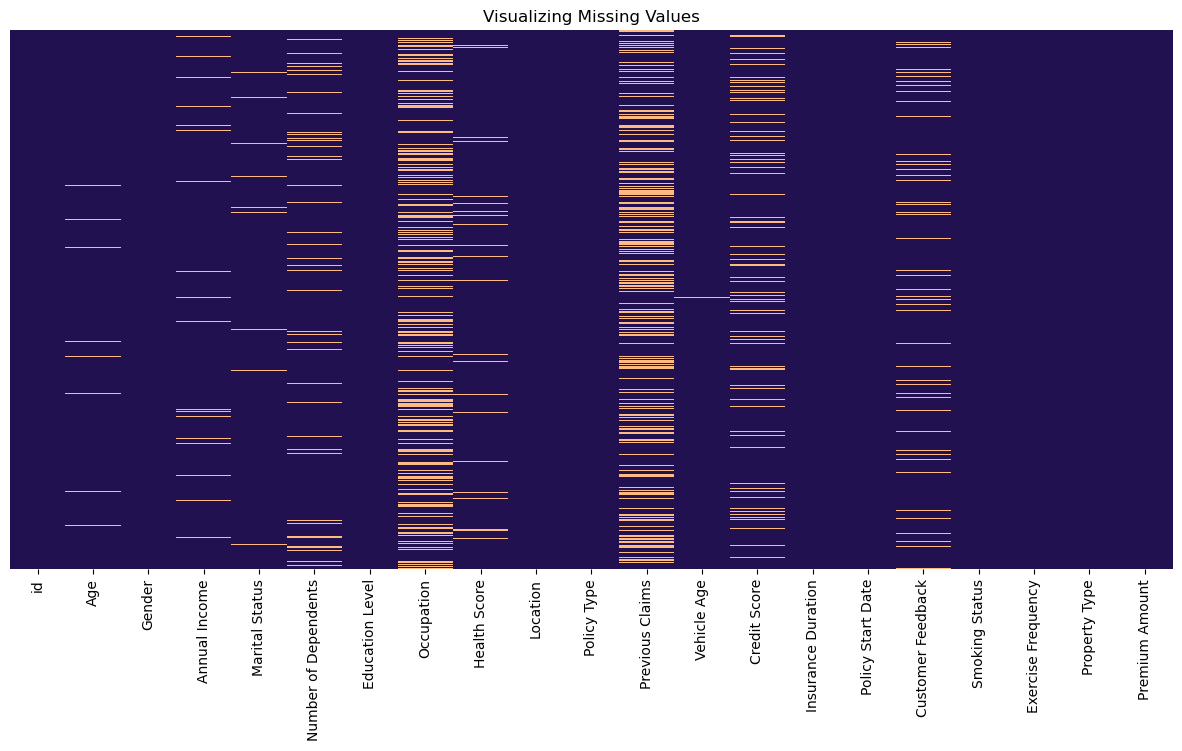

In [10]:
import seaborn as sns

plt.figure(figsize=(15, 7))
plt.title("Visualizing Missing Values")
sns.heatmap(train.isna(), cbar=False, cmap=sns.color_palette('magma'), yticklabels=False);
plt.show()

### Visual Exploration

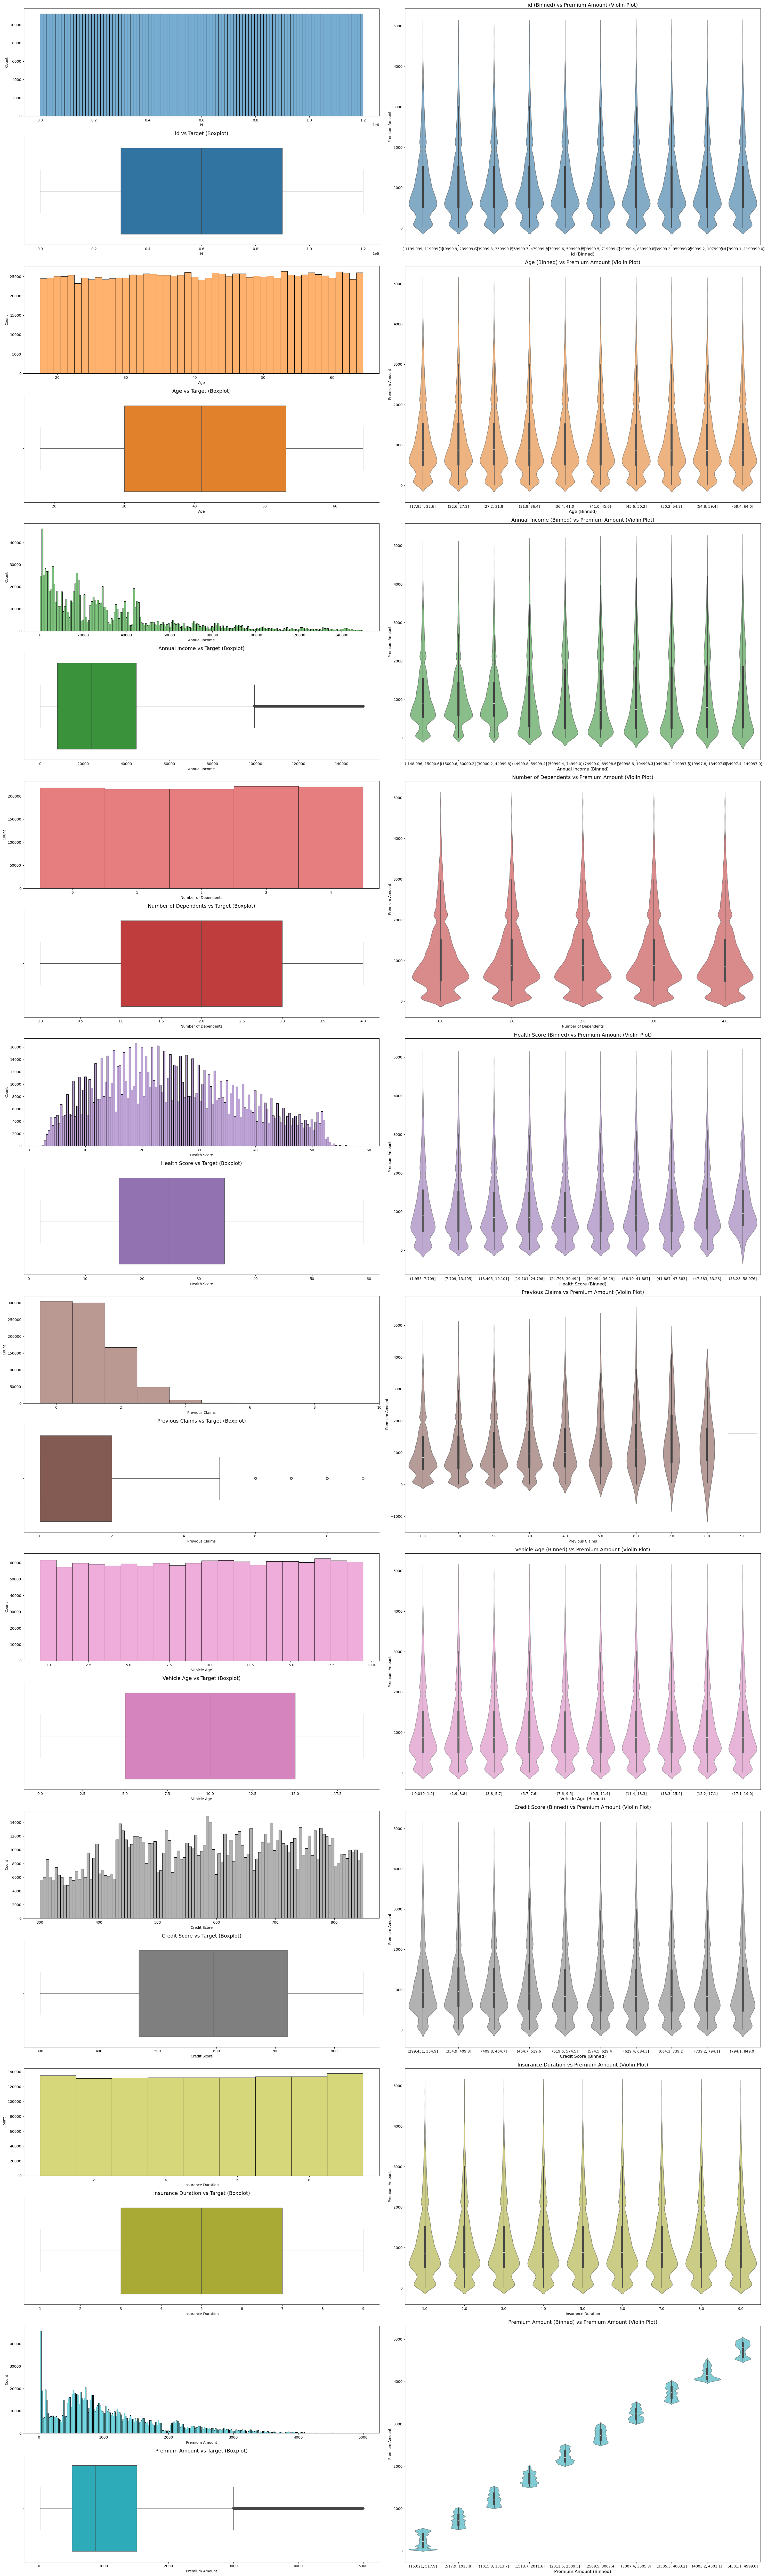

In [11]:
import matplotlib.gridspec as gridspec

palette = sns.color_palette('tab10', len(num_cols))
color_dict = dict(zip(num_cols, palette))

fig = plt.figure(figsize=(30, 10 * len(num_cols)))
gs = gridspec.GridSpec(2 * len(num_cols), 2, figure=fig)

df_binned = train.copy()

for i, col in enumerate(num_cols):
    discrete = train[col].nunique() < 51

    # Plot histogram with a unique color
    ax_hist = fig.add_subplot(gs[2 * i, 0])
    sns.histplot(
        data=train, x=col, fill=True, common_norm=False, alpha=0.6,
        linewidth=0.8, color=color_dict[col], ax=ax_hist, discrete=discrete
    )

    # Plot boxplot with same unique color
    ax_box = fig.add_subplot(gs[2 * i + 1, 0])
    sns.boxplot(data=train, x=col, ax=ax_box, color=color_dict[col])
    ax_box.set_title(f'{col} vs Target (Boxplot)', fontsize=14)
    sns.despine(ax=ax_box)

    # Conditional plot: Violin plot or barplot based on unique values, fallback to scatterplot
    ax_conditional = fig.add_subplot(gs[2 * i : 2 * i + 2, 1])     # Merges 2 rows

    if train[col].nunique() < 11:
        sns.violinplot(
            data=train, x=col, y=target_col, ax=ax_conditional,
            color=color_dict[col], alpha=0.6
        )
        ax_conditional.set_title(f'{col} vs {target_col} (Violin Plot)', fontsize=14)
    
    else:
        df_binned[col + " Binned"] = pd.cut(train[col], bins=10)
        sns.violinplot(
            data=df_binned,
            x=col + " Binned",
            y=target_col,
            ax=ax_conditional,
            color=color_dict[col],
            alpha=0.6
        )
        ax_conditional.set_title(f'{col} (Binned) vs {target_col} (Violin Plot)', fontsize=14)
        ax_conditional.set_xlabel(f'{col} (Binned)', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\yashs\AppData\Local\Temp\ipykernel_1604\3904051819.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\yashs\AppData\Local\Temp\ipykernel_1604\3904051819.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\yashs\AppData\Local\Temp\ipykernel_1604\3904051819.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\yashs\AppData\Local\Temp\ipykernel_1604\3904051819.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue

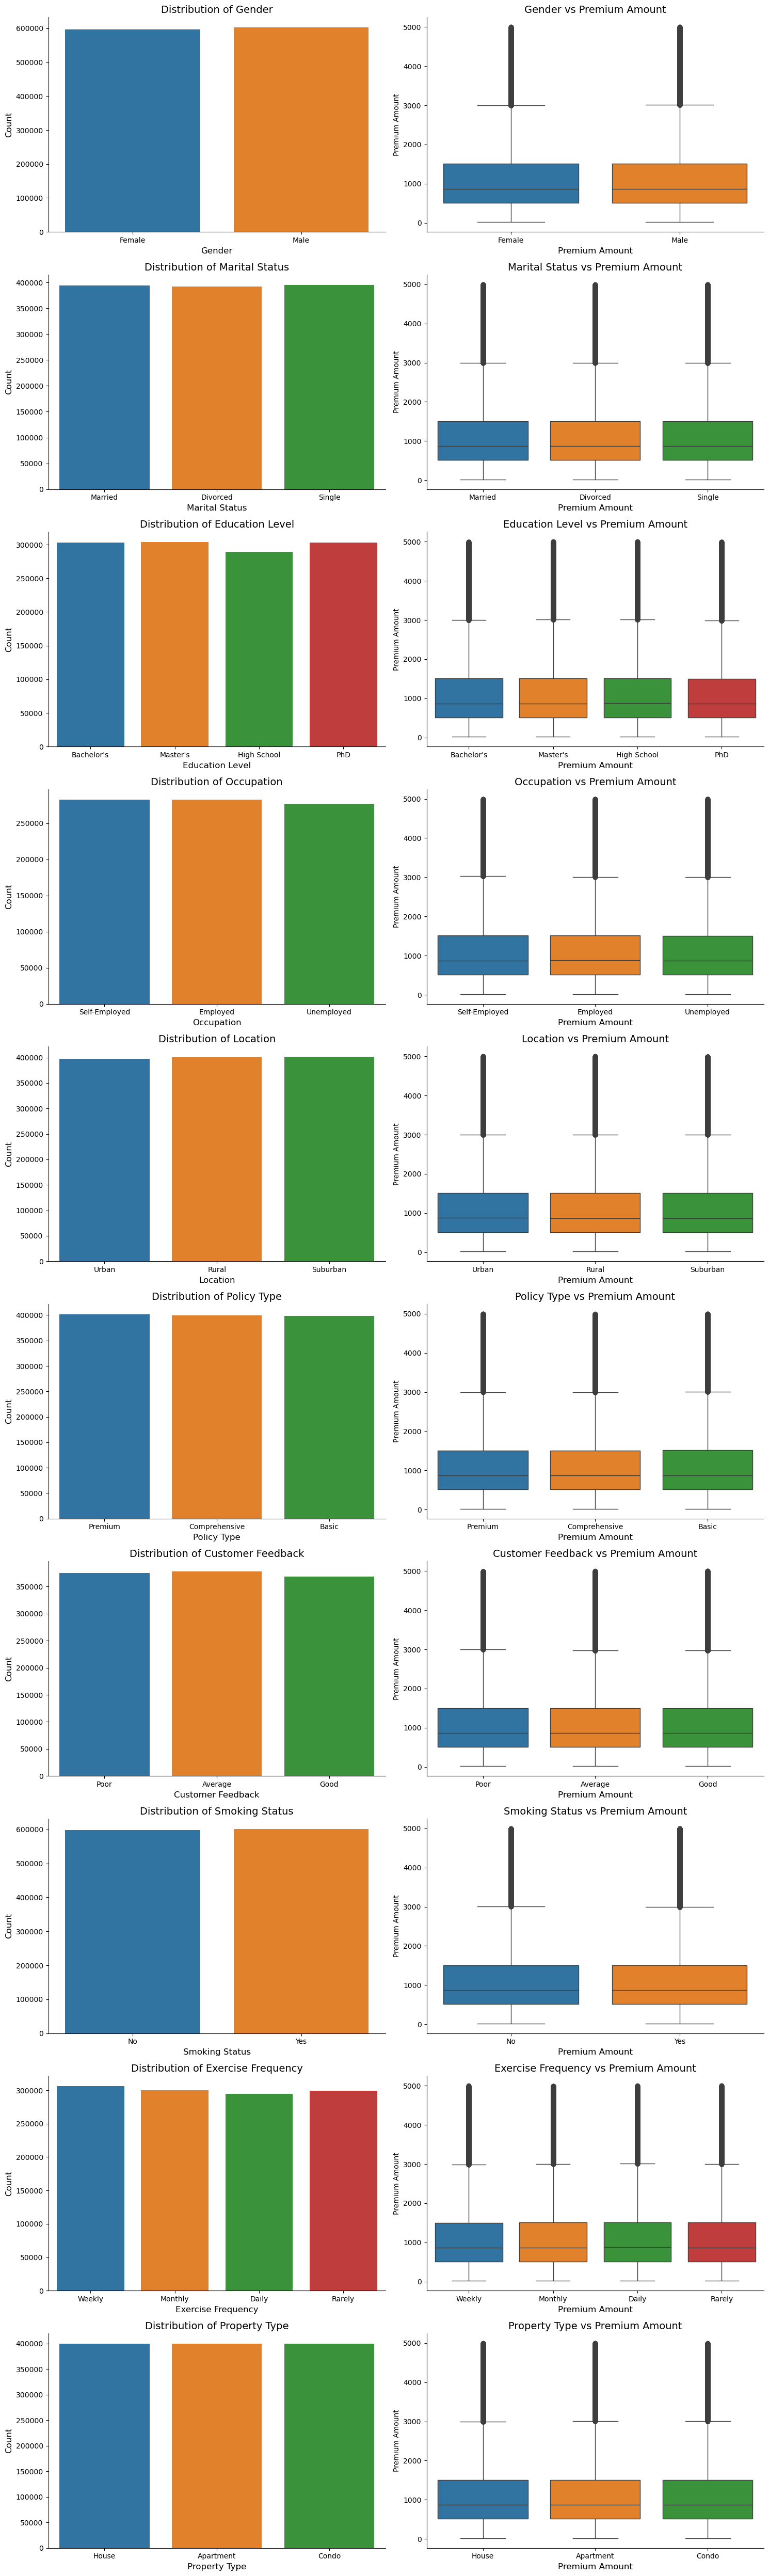

In [12]:
filtered_cols = [col for col in cat_cols if col != 'Policy Start Date']

fig, axes = plt.subplots(len(filtered_cols), 2, figsize=(15, 5 * len(filtered_cols)))

for i, col in enumerate(filtered_cols):
    # Barplot
    sns.countplot(
        data=train,
        x=col,
        ax=axes[i, 0],
        palette='tab10'
    )

    axes[i, 0].set_title(f'Distribution of {col}', fontsize=14)
    axes[i, 0].set_xlabel(col, fontsize=12)
    axes[i, 0].set_ylabel('Count', fontsize=12)
    sns.despine(ax=axes[i, 0])

    # Boxplot
    sns.boxplot(
        data=train,
        x=col,
        y=target_col,
        ax=axes[i, 1],
        palette='tab10'
    )

    axes[i, 1].set_title(f'{col} vs {target_col}', fontsize=14)
    axes[i, 1].set_xlabel(col, fontsize=12)
    axes[i, 1].set_xlabel(target_col, fontsize=12)
    sns.despine(ax=axes[i, 1])

plt.tight_layout()
plt.show()


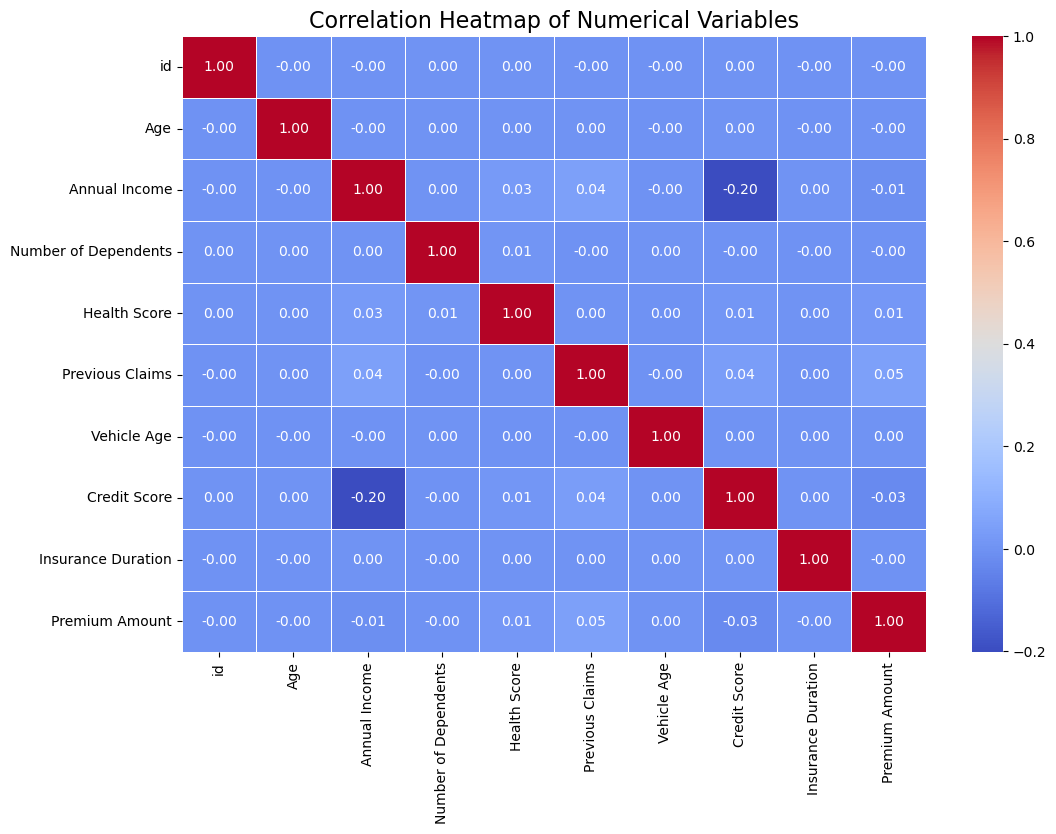

In [13]:
corr_mat = train[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_mat,
    annot=True,
    fmt='.2f',
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.show()

## Data Processing

### Feature Transformation: Date Handling
We transform the `Policy Start Date` feature into multiple useful data-related features.

In [14]:
import numpy as np

def date(df):

    feat = 'Policy Start Date'
    df[feat] = pd.to_datetime(df[feat])
    
    df['Year'] = df[feat].dt.year


    min_year, max_year = df['Year'].min(), df['Year'].max()
    df['Year_sin'] = np.sin(2 * np.pi * (df['Year'] - min_year) / (max_year - min_year))
    df['Year_cos'] = np.cos(2 * np.pi * (df['Year'] - min_year) / (max_year - min_year))

    
    df['Month'] = df[feat].dt.month
    df['Month_name'] = df[feat].dt.month_name()
    df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
    df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

    df['Week'] = df[feat].dt.isocalendar().week
    df['Day_of_week'] = df[feat].dt.day_name()

    df['Day'] = df[feat].dt.day
    df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)
    df['Day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)

    df['Group'] = (df['Year'] - 2020) * 48 + df['Month'] * 4 + df['Day'] // 7

    df.drop(feat, axis=1, inplace=True)

    return df

train = date(train)
test = date(test)


### Splitting Data

In [15]:
X = train.drop(columns=[target_col, 'id', 'Group', 'Year', 'Month', 'Day', 'Week'])
y = train[target_col]

### Handling Missing Values & Preprocessing Pipeline

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Numerical feature Pipeline
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        # ('scaler', StandardScaler())
    ]
)


# Categorical feature Pipeline
cat_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)


# Combining pipelines into a ColumnTransformer
num_feats = X.select_dtypes(exclude='object').columns
cat_feats = X.select_dtypes(include='object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_feats),
        ('cat', cat_pipeline, cat_feats)
    ]
)

X_processed = preprocessor.fit_transform(X)
test_processed = preprocessor.transform(test.drop(columns=['id', 'Group', 'Year', 'Month', 'Day', 'Week']))

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

### Hyperparameter Optimisation

In [33]:
import optuna
import lightgbm as lgb
from sklearn.metrics import root_mean_squared_log_error, mean_squared_error, mean_absolute_error, r2_score


# Define Optuna optimization function
def objective(trial):
    # Define parameter search space
    param = {
        "objective": "regression",
        "metric": "rmse",
        "boosting_type": trial.suggest_categorical("boosting_type", ["gbdt", "dart"]),
        "num_leaves": trial.suggest_int("num_leaves", 200, 512),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
        "feature_fraction": trial.suggest_uniform("feature_fraction", 0.6, 1.0),
        "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.6, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 5, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 100),
        "max_depth": trial.suggest_int("max_depth", -1, 16),  # -1 means no limit
        "lambda_l1": trial.suggest_loguniform("lambda_l1", 1e-4, 10.0),
        "lambda_l2": trial.suggest_loguniform("lambda_l2", 1e-4, 10.0),
        "device_type": "gpu",  # Enable GPU support
        "seed" : 42

    }

    # Create a LightGBM dataset
    dtrain = lgb.Dataset(X_train, label=y_train)
    dval = lgb.Dataset(X_val, label=y_val, reference=dtrain)

    # Train LightGBM model
    model = lgb.train(
        param,
        dtrain,
        valid_sets=[dval],
    )

    # Predict on validation set
    y_val_pred = model.predict(X_val)
    
    # Compute RMSLE using sklearn's root_mean_squared_log_error
    rmsle = root_mean_squared_log_error(y_val, np.maximum(y_val_pred, 0))
    return rmsle

# Run Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=1)

[I 2025-01-23 08:51:12,606] A new study created in memory with name: no-name-bd1ff93f-dbbb-4f5f-a755-2248a93aa86b
C:\Users\yashs\AppData\Local\Temp\ipykernel_1604\3102734560.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
C:\Users\yashs\AppData\Local\Temp\ipykernel_1604\3102734560.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "feature_fraction": trial.suggest_uniform("feature_fraction", 0.6, 1.0),
C:\Users\yashs\AppData\Local\Temp\ipykernel_1604\3102734560.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/relea

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 960000, number of used features: 66
[LightGBM] [Info] Using GPU Device: gfx1150, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 26 dense feature groups (25.63 MB) transferred to GPU in 0.040146 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1102.505529
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 26 dense feature groups (16.51 MB) transferred to GPU in 0.023282 secs. 0 sparse feature groups
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 26 dense feature groups (16.48 MB) transferred to GPU in 0.025970 secs. 0 sparse feature groups
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 26 dense feature groups (16.

[I 2025-01-23 08:51:47,088] Trial 0 finished with value: 1.1724943519011377 and parameters: {'boosting_type': 'dart', 'num_leaves': 371, 'learning_rate': 0.0015709105938707599, 'feature_fraction': 0.7315340408096609, 'bagging_fraction': 0.6428435469115056, 'bagging_freq': 10, 'min_data_in_leaf': 98, 'max_depth': 16, 'lambda_l1': 0.0024091980164258294, 'lambda_l2': 0.00041484298437625283}. Best is trial 0 with value: 1.1724943519011377.


### Model Training

In [35]:
# Train final model with best parameters
best_params = study.best_params

final_model = lgb.train(
    best_params,
    lgb.Dataset(X_processed, label=y),
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1040
[LightGBM] [Info] Number of data points in the train set: 1200000, number of used features: 66
[LightGBM] [Info] Start training from score 1102.544822


### Model Evaluation

In [36]:
y_pred = final_model.predict(X_processed)

rmsle = root_mean_squared_log_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

# Display performance metrics
print(f"\nPerformance Metrics:\n{'-'*30}")
print(f"RMSLE: {rmsle:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")


Performance Metrics:
------------------------------
RMSLE: 1.1049
RMSE: 987.9902
MAE: 679.4740
R²: -0.3046
MAPE: 173.93%


C:\Users\yashs\AppData\Local\Temp\ipykernel_1604\237034793.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


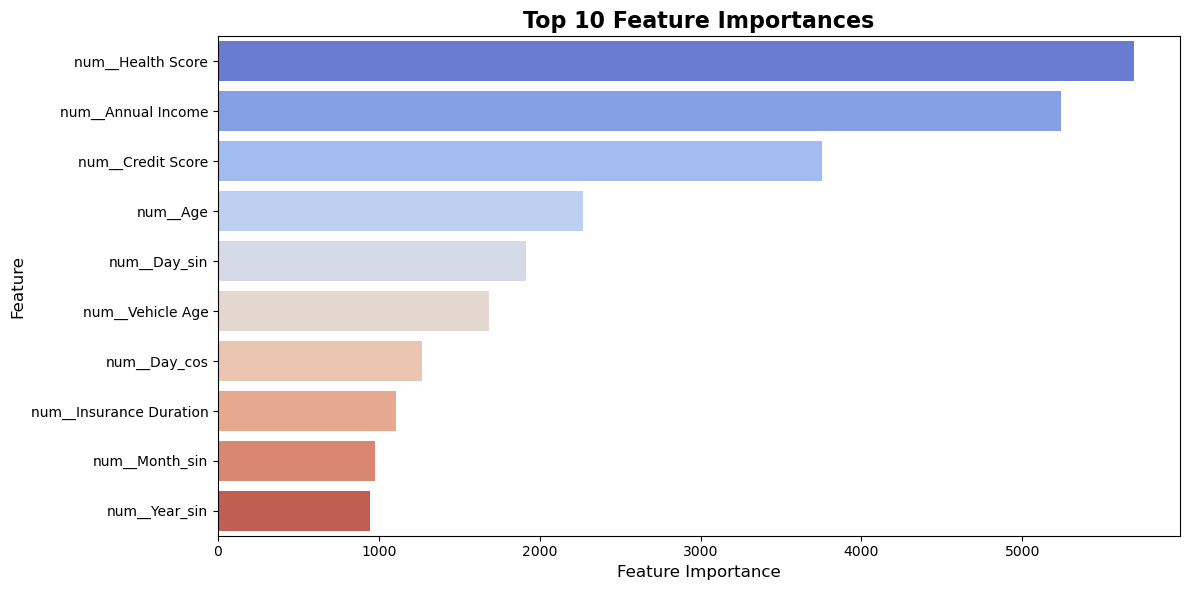

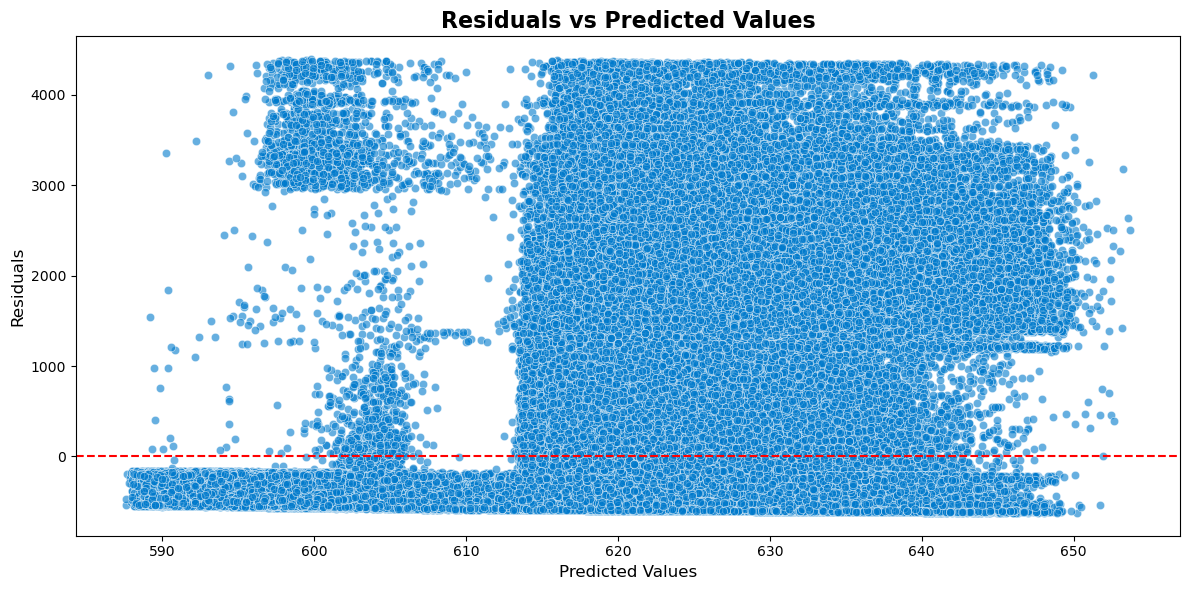

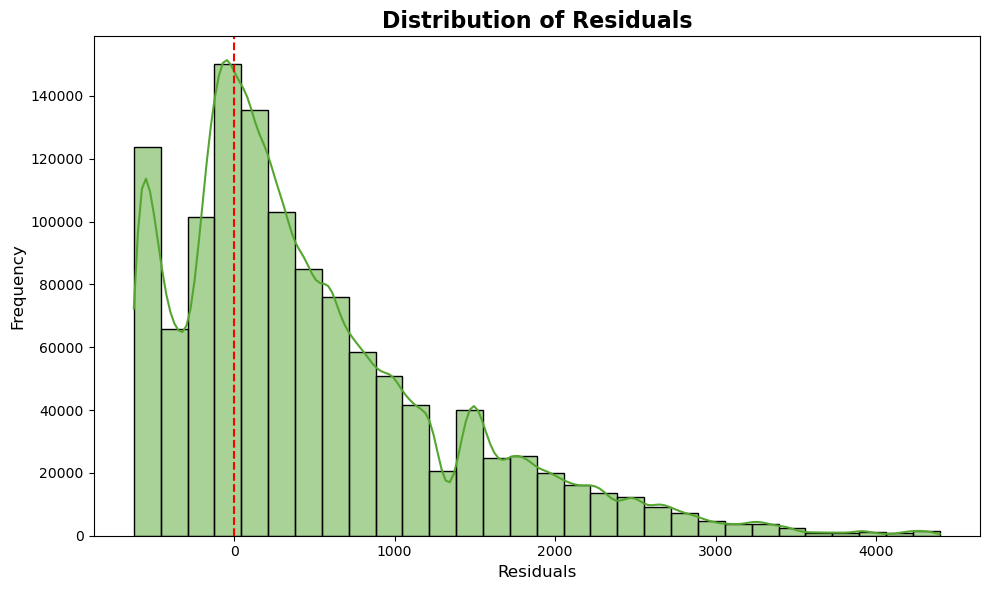

In [37]:
# Feature Importance
importances = final_model.feature_importance(importance_type='split')   # or 'gain
features = preprocessor.get_feature_names_out()
sorted_indices = importances.argsort()[::-1]


importance_df = pd.DataFrame({
    'Feature': [features[i] for i in sorted_indices],
    'Importance': importances[sorted_indices]
})


plt.figure(figsize=(12, 6))
sns.barplot(
    data=importance_df.head(10),
    x='Importance',
    y='Feature',
    palette='coolwarm'
)
plt.title("Top 10 Feature Importances", fontsize=16, fontweight='bold')
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

# Residual Analysis
residuals = y - y_pred


plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=y_pred,
    y=residuals,
    alpha=0.6,
    color='#007acc'
)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title("Residuals vs Predicted Values", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(
    residuals,
    bins=30,
    kde=True,
    color='#55a630'
)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.5)
plt.title("Distribution of Residuals", fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()